## Scraping data about players ranking in ekstraklasa: https://www.sofascore.com/tournament/football/poland/ekstraklasa/202

### Libraries

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import seaborn as sns
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt

### Code

In [47]:
url = "https://www.sofascore.com/tournament/football/poland/ekstraklasa/202"
group_data = []
s = Service('C:\webdrivers\chromedriver.exe')
driver = webdriver.Chrome(service=s)
driver.get(url)


WebDriverWait(driver, 15).until(EC.presence_of_element_located((By.XPATH, '//button[@class="fc-button fc-cta-consent fc-primary-button"]')))
cookies = driver.find_element(By.XPATH,'//button[@class="fc-button fc-cta-consent fc-primary-button"]')
cookies.click()
driver.refresh()

all_data = []

for page in range(1,26):
    table = driver.find_elements(By.XPATH,'.//table[@class="sc-75bb9fa3-8 lnrjHE"]//tbody//tr')
    print(f'Getting data from {page} page')
    for each_row in table:
        ranking = each_row.find_element(By.XPATH,'(.//td)[1]').text.strip()
        team = each_row.find_element(By.XPATH,'(.//td)[2]//a//img')
        team_name = team.get_attribute('alt').strip()
        name = each_row.find_element(By.XPATH,'(.//td)[3]').text.strip()
        goals = each_row.find_element(By.XPATH,'(.//td)[4]').text.strip()
        succ_dribbles = each_row.find_element(By.XPATH,'(.//td)[5]').text.strip()
        tackles = each_row.find_element(By.XPATH,'(.//td)[6]').text.strip()
        assists = each_row.find_element(By.XPATH,'(.//td)[7]').text.strip()
        accurate_passes_percentage = each_row.find_element(By.XPATH,'(.//td)[8]').text.strip()
        avg_sofascore_rating = each_row.find_element(By.XPATH,'(.//td)[9]').text.strip()
        all_data.append({'ranking':ranking,
                         'team':team_name,
                         'name':name,
                         'goals':goals,
                         'succ_dribbles':succ_dribbles,
                         'tackles':tackles,
                         'assists':assists,
                         'accurate_passes_percentage':accurate_passes_percentage,
                         'avg_sofascore_rating':avg_sofascore_rating
                         })
    WebDriverWait(driver, 15).until(EC.presence_of_element_located((By.XPATH, '(//button[@class="sc-aXZVg cvCpYM"])[2]')))
    next_page = driver.find_element(By.XPATH,'(//button[@class="sc-aXZVg cvCpYM"])[2]')
    if page != 25:
        next_page.click()
    time.sleep(1)



Getting data from 1 page
Getting data from 2 page
Getting data from 3 page
Getting data from 4 page
Getting data from 5 page
Getting data from 6 page
Getting data from 7 page
Getting data from 8 page
Getting data from 9 page
Getting data from 10 page
Getting data from 11 page
Getting data from 12 page
Getting data from 13 page
Getting data from 14 page
Getting data from 15 page
Getting data from 16 page
Getting data from 17 page
Getting data from 18 page
Getting data from 19 page
Getting data from 20 page
Getting data from 21 page
Getting data from 22 page
Getting data from 23 page
Getting data from 24 page
Getting data from 25 page


### Cleaning the data

In [48]:
df = pd.DataFrame(all_data)

In [89]:
df.head()

,ranking,team,name,goals,succ_dribbles,tackles,assists,accurate_passes_percentage,avg_sofascore_rating
0,1,Pogoń Szczecin,Patryk Paryzek,1,1,1,0,100.00,7.80
1,2,Pogoń Szczecin,Kamil Grosicki,9,21,5,7,76.64,7.61
2,3,MKS Korona Kielce,Konrad Forenc,0,0,0,0,66.97,7.55
3,4,Legia Warszawa,Josué,6,7,22,0,82.93,7.54
4,5,Radomiak Radom,Roberto Alves,0,2,12,0,86.15,7.50


In [50]:
df.dtypes

ranking                       object
team                          object
name                          object
goals                         object
succ_dribbles                 object
tackles                       object
assists                       object
accurate_passes_percentage    object
avg_sofascore_rating          object
dtype: object

In [51]:
for col in ["ranking","goals","succ_dribbles","tackles","assists","accurate_passes_percentage"]:
    df[col] = pd.to_numeric(df[col])

In [52]:
df['avg_sofascore_rating'] = pd.to_numeric(df['avg_sofascore_rating'].replace('-',np.nan))

In [53]:
df.dtypes

ranking                         int64
team                           object
name                           object
goals                           int64
succ_dribbles                   int64
tackles                         int64
assists                         int64
accurate_passes_percentage    float64
avg_sofascore_rating          float64
dtype: object

In [81]:
df['avg_sofascore_rating'].mean()

6.774634146341464

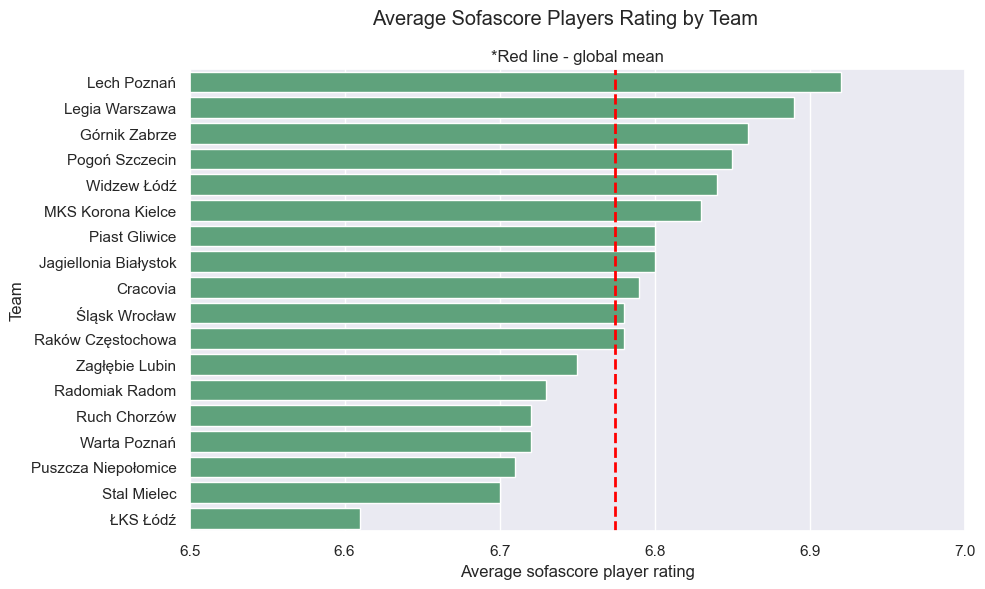

In [88]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(data=df.groupby(['team'])['avg_sofascore_rating'].mean().sort_values(ascending=False).round(2).reset_index(),
y="team",
x="avg_sofascore_rating",
color="#54AD7B")
plt.xlabel("Average sofascore player rating")
plt.ylabel("Team")
plt.suptitle("Average Sofascore Players Rating by Team")
plt.title("*Red line - global mean")
plt.xlim(6.5,7)
plt.axvline(x=df['avg_sofascore_rating'].mean(), color='red', linestyle='--', linewidth=2)
plt.show()